# Neural Networks (part 2)

## 1. Introduction 
In this notebook you create a NN for recognizing handwritten digits.

## 2. Loading the data

You make use of the MNIST dataset. The dataset consists of 70000 images of 28$\times$28 pixels (each pixel has a gray value 0 - 255). The dataset can be downloaded from the internet (see code below).

In [1]:
# importing the required modules
import numpy as np
import matplotlib.pyplot as plt
import random as random

# to get matplot figures render correctly in the notebook use:
%matplotlib inline 

In [2]:
# Load data from https://www.openml.org/d/554

from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
X = X.T  # required as the rows should be the features and the columns the samples; shape (784, 70000).
y = y.astype('int')  # y has values as strings ('0', '1', ...'9') and we want integers (0, 1, ..., 9)
# inspect shape.
print(X.shape)
print(y.shape)


(784, 70000)
(70000,)


To have an idea of the data let's print a single sample

label = 5


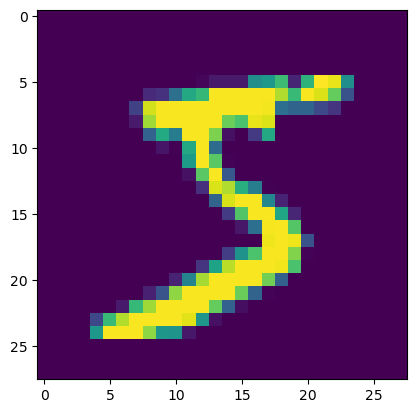

In [3]:
sample = X[:, 0]  # sample number 1
label = y[0]  # label of sample 1
plt.imshow(sample.reshape(28,28))  # need to reshape to a square image of 28 by 28
print(f'label = {label}')

## 3. Create the feature matrix X and labels matrix Y


In [4]:
# rescale feature matrix to values between 0 and 1
  
normalized_X = (X - np.min(X)) / (np.max(X) - np.min(X))
print(normalized_X.shape)
# print(normalized_X)
#create one-hot encoded Y matrix
##y= y.astype(int)
labels = y.astype(int)
Y_encoded = np.eye(10)[:, labels]

(784, 70000)


In [5]:
# create a train, validation and test dataset
# for the test data set take the first 5000 samples
# for the train data set take sample 5001 to 60000
# for the validation set take sample 60001 to 70000

X_test  = normalized_X[:,:5000]
X_train = normalized_X[:,5000:60000]
X_valid = normalized_X[:,60000:] ##fine

Y_test  = Y_encoded[:,:5000]
Y_train = Y_encoded[:,5000:60000]
Y_valid = Y_encoded[:,60000:] 


## 4. The Neural Network

The NN that you will make has the following layout (this is something that will work, but feel free to make changes if you like):

- input layer ($l=0$): 784 nodes
- hidden layer ($l=1$): 300 nodes; ReLu activation function
- hidden layer ($l=2$): 100 nodes; ReLu activation function
- output layer ($l=3$): 10 nodes; Softmax activation function


### Define the activation functions

Below you define the required activation functions and their derivatives.

In [6]:
# define some activation functions

def relu(z):
    """
    returns the ReLu function of z

    Parameters
    ----------
    z : 2D ndarray

    Returns
    -------
    out : same type and shape as z

    """
    relu_z = np.maximum(0,z)
    return relu_z

def relu_diff(z):
    """
    returns the derivative of the relu function of z

    Parameters
    ----------
    z : 2D ndarray

    Returns
    -------
    out : same type and shape as z

    """
    z[z<=0] = 0
    z[z>0] = 1
    return z

def softmax(z):
    """
    returns the softmax function of z

    Parameters
    ----------
    z : 2D ndarray

    Returns
    -------
    out : same type and shape as z

    """
  # Calculate the softmax function by dividing exp(z) by the sum of exp(z)
    softmax_z = np.exp(z) / np.sum(np.exp(z), axis=0, keepdims=True)
    
    return softmax_z





### Initalize the weights and biases


In [7]:
# intialize the neural network
rng = np.random.default_rng()

# number of nodes in each layer
n0 = 784
n1 = 300
n2 = 100
n3 = 10

# input layer
# no weights and biases

# hidden layer 1 
W1 = np.random.normal(0, 1/np.sqrt(n0), (n1, n0))
b1 = np.random.normal(0, size= (n1, 1))

# hidden layer 2 
W2 = np.random.normal(0, 1/np.sqrt(n1), (n2, n1))
b2 = np.random.normal(0, size= (n2, 1))

# output layer 
W3 = np.random.normal(0, 1/np.sqrt(n2), (n3, n2))
b3 = np.random.normal(0, size= (n3, 1))


## 5. Train the NN

First you define three parameters that can be adjusted for optimal training.
- **learning_rate**: determines to what extend we update the weights and biases in the gradient descent step
- **no_epochs**: the number of times we pass the training data set through the network for training
- **batch_size**: how many samples we pass through the network before doing a gradient descent update

In [8]:
# train settings
learning_rate = 0.1
no_epochs = 30
batch_size = 100

Below you implement the training of the network. As a start copy and paste your code from part 1. Note that we use the **Cross Entropy** (CE) loss function.

In [9]:
# perform the training
X_batches = []
Y_batches = []
acc_history_T=[]

acc_history_Test=[]

acc_valid=[]
validation_losses=[]

losses = []
# print(train_Y.shape)
# print(X_train.shape)
num_batches = X_train.shape[1] // batch_size
for i in range(num_batches-1):
    
    X_batches.append(X_train[:,batch_size*i:batch_size*i+batch_size])
    Y_batches.append(Y_train[:,batch_size*i:batch_size*i+batch_size])
    
    ## we do not account for batches that leave remainders. Hence batch size should be a multiple of 10 for convinience.
    
pre_factor = learning_rate / batch_size 

for epoch in range(1,  no_epochs+1):
    
    # for each epoch train over all batches
    for X_batch, Y_batch in zip(X_batches,Y_batches):
    ## forward pass
        # compute the output of the network for the batch
#         print(W1.shape, X_batch.shape)
        
        output1 = W1 @ X_batch + b1  
#         print(output1)
        output2 = W2 @ relu(output1) + b2 
        output3 = W3 @ relu(output2) + b3
        Output = softmax(output3)
#         print(Output)
        
     ## backward pass
        # compute the derivatives dLdW and dLdb for the layers (use CE loss)
        
        dLdz3 = Output- Y_batch 
        dLdW3 = dLdz3@ relu(output2).T
        
        dLdz2= relu_diff(output2) * (W3.T@dLdz3) ## gradient of loss function (predicted - target probabilities = prediction error)
        dLdW2 = dLdz2@ relu(output1).T

        dLdz1= relu_diff(output1) *(W2.T@dLdz2)
        dLdW1 = dLdz1@ X_batch.T

#         dLdb1= dLdz1
#         dLdb2= dLdz2
#         dLdb3= dLdz3
        
#         n= len(dLdz1)
#         dLdb1=1 / n * np.sum(dLdz1)
#         m = len(dLdz2)
#         dLdb2 = 1 / m * np.sum(dLdz2)   
#         l = len(dLdz3)
#         dLdb3 = 1 / l * np.sum(dLdz3)
        dLdb3 = np.sum(dLdz3, axis=1, keepdims = True)
        dLdb2 = np.sum(dLdz2, axis=1, keepdims = True)
        dLdb1 = np.sum(dLdz1, axis=1, keepdims = True)
        
        # gradient descent step / update weights and biases
        W3 = W3 - pre_factor * dLdW3
        b3 = b3 - pre_factor * dLdb3
        W2 = W2 - pre_factor * dLdW2
        b2 = b2 - pre_factor * dLdb2
        W1 = W1 - pre_factor * dLdW1
        b1 = b1 - pre_factor * dLdb1

    # for each epoch evaluate the network performance
    # compute accuracy of train set and store for later analysis
#     if epoch%10==0:
    z1 = W1 @ X_train + b1
    z2 = W2 @ relu(z1) + b2
    z3 = W3 @ relu(z2) + b3
    Output = softmax(z3)
#     print(Output)
    predicted_labels = np.argmax(Output, axis=0)
#     print("predicts:",predicted_labels)
    true_labels = np.argmax(Y_train, axis=0)
#     print("true labels:",true_labels)
    accuracy_T = np.mean(predicted_labels == true_labels)
    acc_history_T.append(accuracy_T)
    M = X_train.shape[1]

    losses.append(-1/M * np.sum(Y_train*np.log(Output)))

    print(f"Epoch {epoch}/{no_epochs}: train_acc={accuracy_T:.2%}")
    z1 = W1 @ X_valid + b1
    z2 = W2 @ relu(z1) + b2
    z3 = W3 @ relu(z2) + b3
    Output = softmax(z3)
    predicted_labels = np.argmax(Output, axis=0)
    true_labels = np.argmax(Y_valid, axis=0)
    accuracy_valid = np.mean(predicted_labels == true_labels)
    acc_valid.append(accuracy_valid)
    validation_losses.append( -1/M * np.sum(Y_valid*np.log(Output)))


     

## It takes a long time to load results. 

Epoch 1/30: train_acc=90.96%
Epoch 2/30: train_acc=93.75%
Epoch 3/30: train_acc=95.23%
Epoch 4/30: train_acc=96.20%
Epoch 5/30: train_acc=96.75%
Epoch 6/30: train_acc=97.22%
Epoch 7/30: train_acc=97.55%
Epoch 8/30: train_acc=97.88%
Epoch 9/30: train_acc=98.25%
Epoch 10/30: train_acc=98.53%
Epoch 11/30: train_acc=98.77%
Epoch 12/30: train_acc=98.94%
Epoch 13/30: train_acc=99.08%
Epoch 14/30: train_acc=99.22%
Epoch 15/30: train_acc=99.31%
Epoch 16/30: train_acc=99.41%
Epoch 17/30: train_acc=99.45%
Epoch 18/30: train_acc=99.51%
Epoch 19/30: train_acc=99.58%
Epoch 20/30: train_acc=99.61%
Epoch 21/30: train_acc=99.66%
Epoch 22/30: train_acc=99.71%
Epoch 23/30: train_acc=99.76%
Epoch 24/30: train_acc=99.80%
Epoch 25/30: train_acc=99.83%
Epoch 26/30: train_acc=99.85%
Epoch 27/30: train_acc=99.86%
Epoch 28/30: train_acc=99.89%
Epoch 29/30: train_acc=99.90%
Epoch 30/30: train_acc=99.92%


## 6. Analyze the result
Make a plot of the training and validation loss and training and validation accuracy as function of the epoch.

30


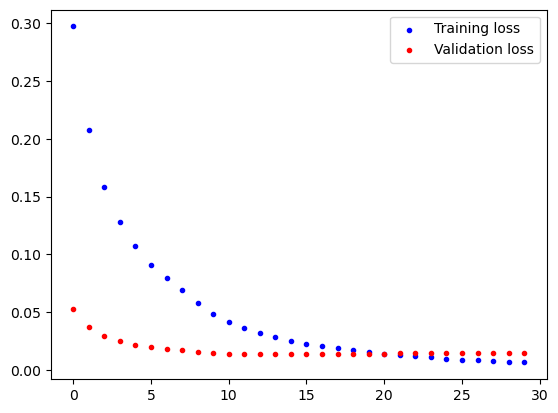

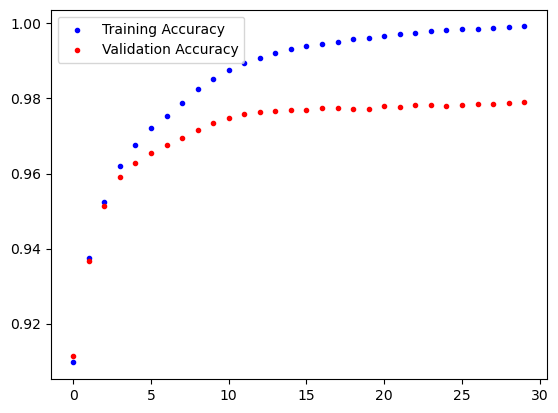

In [17]:
# # plot the loss and accuracy as function of the epoch number
# validation_losses=[]
# ## validation accuracy
# z1 = W1 @ X_valid + b1
# z2 = W2 @ relu(z1) + b2
# z3 = W3 @ relu(z2) + b3
# Output = softmax(z3)
# predicted_labels = np.argmax(Output, axis=0)
# print("predicts:",predicted_labels)
# true_labels = np.argmax(Y_valid, axis=0)
# print("true labels:",true_labels)
# accuracy_T = np.mean(predicted_labels == true_labels)
# acc_history_T.append(accuracy_T)
# M = X_valid.shape[1]
# validation_losses.append( -1/M * np.sum(Y_valid*np.log(Output)))


# print(acc_history_V)
print(len(losses))
plt.scatter(range(no_epochs),losses, marker='.',color='blue',label='Training loss')
plt.scatter(range(no_epochs),validation_losses, marker='.',color='red',label='Validation loss')
plt.legend()
plt.show()
## plot for training accuracy
plt.scatter(range(no_epochs),acc_history_T, marker='.', color ='blue',label='Training Accuracy')
plt.scatter(range(no_epochs),acc_valid, marker='.', color ='red',label='Validation Accuracy')
plt.legend()

Adapt the hyperparameters and/or NN layout to try to improve the result.

Finally use the test set to check the performance of the model

In [11]:
# compute the accuracy and losses of the test set

z1 = W1 @ X_test + b1
z2 = W2 @ relu(z1) + b2
z3 = W3 @ relu(z2) + b3
Output = softmax(z3)
predicted_labels = np.argmax(Output, axis=0)
print("predicts:",predicted_labels)
true_labels = np.argmax(Y_test, axis=0)
print("true labels:",true_labels)
accuracy_Test = np.mean(predicted_labels == true_labels)
acc_history_Test.append(accuracy_Test)

print(acc_history_Test)
print( -1/M * np.sum(Y_test*np.log(Output)))

predicts: [5 0 4 ... 2 1 2]
true labels: [5 0 4 ... 2 1 2]
[0.9802]
0.007214199692370165


Finally it is interesting to check a few samples and their predicted label

In [12]:
# check the prediction of 10 random images
index = np.random.randint(len(predicted_labels), size=10)
predicted_label = []
true_label = []

for i in index:
    predicted_label.append(predicted_labels[i]) 
    true_label.append(true_labels[i])  
    print(f"Label: {true_label[-1]}, Prediction: {predicted_label[-1]}")


Label: 1, Prediction: 1
Label: 3, Prediction: 3
Label: 3, Prediction: 3
Label: 1, Prediction: 1
Label: 2, Prediction: 2
Label: 5, Prediction: 5
Label: 6, Prediction: 6
Label: 4, Prediction: 4
Label: 1, Prediction: 1
Label: 1, Prediction: 1
